# Direct detection of Dark Matter

###  Pepijn Clarijs, Harm van Leijen, Matthijs Laan en Kerwin Buijsman

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import chisquare
from scipy.stats import poisson
from matplotlib import ticker, cm
from scipy import stats

The following distribution is called a Poisson distribution, and it is assumed that measuring DM interaction events varies from the true value by this value. The formula looks like 
 
$P = \frac{e^{-\lambda}\cdot \lambda ^ k}{k!}$

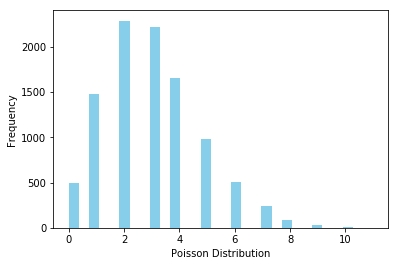

In [4]:
k = np.linspace(0,10,10000)
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.show()

Since the number of measured events is zero, and the expected number of background events is zero as well, a lambda value of 3 is the maximum number of expected events to include zero events at a 95% confidence level. This can be demonstrated by plugging in the number of measured events for k, and the number of expected events for lambda.

In [5]:
CL = 95
expected = - np.log(1-CL/100)
print("Cap at", CL,"% Confidence level")
print("maximum expected events when measuring zero events:", expected)

Cap at 95 % Confidence level
maximum expected events when measuring zero events: 2.99573227355399


This is the reason why 3 events is the number used for the following analysis. Limits on the DM cross section are calculated as a function of DM mass, for a setup consisting of 500 kg of Xenon, over an observation period of one year.   

In [6]:
# First we define the units. We work in cgs.

# Units:
g = 1.
cm = 1.
s = 1.
erg = 1.
eV = 1.60217662 * 10**(-12) * erg
keV = 10**3 * eV
MeV = 10**6 * eV
GeV = 10**9 * eV
kg = 10**3 * g
km = 10**5 * cm
hour = 60 * 60 * s
year = 31557600 * s
u = 1.660538782 * 10**(-24) * g
c = 2.99792458 * 10**(10) * cm/s
ev_joule = 1.6 * 10**(-19)

# Constants:
rho = 0.3 * GeV / (c**2) /cm**3 # dm mass density in g/cm**3
N_A = 6.022140857 * 10**23 # mol**(-1) 
A = 130 # g/mol
v_0 = 220. * km/s # so in cm/s
v_avg = 2 * v_0 / (np.sqrt(np.pi)) # in cm/s
m_proton = 1.67262192369 * 10**(-27) * kg # in g
m_xenon = m_proton #A*u # in g

To plot the dark matter mass to the cross-section, we are integrating $\frac{dR(E_R)}{dE_R}$ from $3$ to infinity

we find $R = R_0e^{-\frac{3keV}{rE_0}}$. Using that $N = R \times 500 kg \times 1 year = 3$ and $R_0 = \frac{NA\rho \mu^2A^2<v>\sigma}{Am{\chi}m_p^2}$, we find the expression for the cross section to be: $\sigma = \frac{3}{500\times kg \times year}(\frac{mp^2m{\chi}}{N_A\rho A<v>\mu^2})e^{-\frac{3keV}{rE_0}}$.

In [7]:
# The needed functions

def mu(m_dm):
    return (m_dm * m_xenon) / (m_dm + m_xenon)

def r(m_dm):
    return (4 * (mu(m_dm)**2)) / (m_dm * m_xenon)

def E_0(m_dm):
    return (1. / 2.) * m_dm * v_0**2

def exponential(m_dm):
    return np.exp((3 * keV) / (r(m_dm) * E_0(m_dm)))

def sigma(m_dm):    
    N_factor = 3 / (500 * kg * year)
    constants = (m_proton**2) / (N_A * rho * A**(3) * v_avg)
    return N_factor * constants * (m_dm / (mu(m_dm)**2)) * exponential(m_dm)


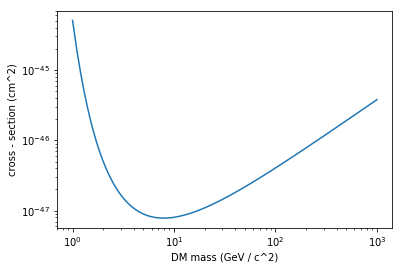

In [8]:
# Now to plot the cross section against the WIMP mass
m_dm1 = 10**2 * (GeV / (c**2))

list_mass_dm = np.linspace(1 * GeV/ c**2, 1000 * GeV/c**2, 10000)
sigma_dm_list = []
list_exponent = []


for m in list_mass_dm:
    sigma_dm_list.append(sigma(m))
    list_exponent.append(exponential(m))
    
    
plt.plot(list_mass_dm * c**2 / GeV,sigma_dm_list)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("cross - section (cm^2)")
plt.xlabel("DM mass (GeV / c^2)")
plt.show()


When we compare our predicted constraints with the latest published constraints from the Xenon-1T experiment, we see that our graph is a little bit different. The minimum of the graph from the experiment is around (30, 4 * $10^{-47}$) and our minimum is around (8, 8 * $10^{-48}$). The shape of our graph is similar to that of the graph of the experiment. We went over the whole process a couple of times, but unfortunately we always end up with a wrong prediction of the constraints. We use the same method  in the next part of the exercise to calculate the expected number of events, so we will also get some wrong numbers. 

Next we want to calculate the expected events for the energy bands 3 - 10 keV and 10 - 20 keV. We do this by using: expected events = R x 500 kg x 1 year. We calculate R now by integrating from 3 - 10 keV and 10 - 20 keV instead of 3 - $\infty$ keV. We can calculate the value of R for every possible combination of dm mass and cross-section. We are using the same derivation as above, but now want an expression for R instead of $\sigma$. We get 

$R = R_0 (- e^{-\frac{10keV}{rE_0}} + e^{-\frac{3keV}{rE_0}})$ and $R = R_0 (- e^{-\frac{20keV}{rE_0}} + e^{-\frac{10keV}{rE_0}})$ with $R_0 = \frac{NA\rho \mu^2A^2<v>\sigma}{Am{\chi}m_p^2}$

We can calculate the best-fit point by measuring the minimum chi-square value. The corresponding values of the dm mass and cross section are the best fit point. We can calculate the (weighted) ${\chi}^2$ by: ${\chi}^2=\frac{1}{d}\sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$. Here is d the number of degrees of freedom, $O_i$ the observed value and $E_i$ the expected value. In our case we have 2 values observed (1 degrees of freedom); 10 events for a recoil energy of 3 - 10 keV and 5 events for a recoil energy of 10 - 20 keV. Now we can calculate our best-fit point.

In [9]:
def exponential(m_dm,recoil):
    return np.exp(-1 * (recoil * keV) / (r(m_dm) * E_0(m_dm)))

# Calculate the value of R for a given recoil energy range, dm mass and cross section
def R(m_dm,Er_min,Er_max,sigma):
    constants = (N_A * rho * A**(3) * v_avg)/(m_proton**2) 
    return constants * mu(m_dm)**2 / m_dm  * sigma * (-1 * exponential(m_dm,Er_max) + exponential(m_dm,Er_min))

# In this function, the number of expected events is calculated
def expected_events(m_dm,Er_min,Er_max,sigma_SI):
    return R(m_dm,Er_min,Er_max,sigma_SI) * 500 * kg * 1 * year



The best fit point: mass = 910.298 GeV and sigma = 1.842e-44 cm**2, with a chi square of 292.183 
The corresponding expected events with E_recoil = 3 - 10 KeV: 160.1530937798546
The corresponding expected events with E_recoil = 10 - 20 KeV: 0.15503871530319263


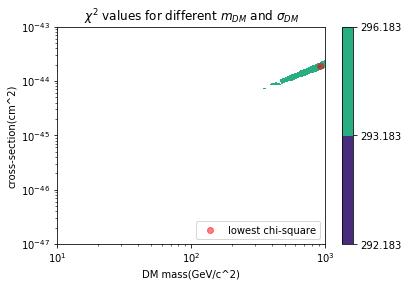

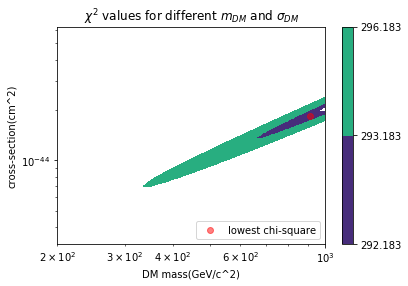

In [15]:
dark_matter_masses = np.logspace(np.log10(10*GeV/c**2),np.log10(1000* GeV/c**2),50)
sigmas = np.logspace(-47,-43,50)

chi_square_min = 1000000
matrix = []

def chi_to_p(chi,dof):
    return stats.chi2.cdf(chi, dof)

# Here is chi-square calculated for every possible combination of the dm mass and cross section from the created lists.
# The best-fit point are the corresponding values of dm mass and cross section when the chi-square value is the lowest.
for j in range(len(dark_matter_masses)):
    m = dark_matter_masses[j]
    matrix.append([])
    for i in range(len(sigmas)):
        s = sigmas[i]
        first_bin = expected_events(m,3,10,s)
        second_bin = expected_events(m,10,20,s)
        chi_square = chisquare([10,5],[first_bin,second_bin])
        p_value = chi_to_p(chi_square[0],2)
        matrix[j].append(chi_square[0])
        
        
        if chi_square[0] < chi_square_min:
            i_min = i
            j_min = j
            chi_square_min = chi_square[0]
            mass_dm_min = m
            sigma_min = s
            
# print the minimum chi-square value with the corresponding dm mass and cross section
# Also print the corresponding expected events
print("The best fit point: mass = %.3f GeV and sigma = %.3e cm**2, with a chi square of %.3f " %(mass_dm_min * c**2 /GeV,sigma_min,chi_square_min))
print("The corresponding expected events with E_recoil = 3 - 10 KeV:",expected_events(mass_dm_min,3,10,sigma_min))
print("The corresponding expected events with E_recoil = 10 - 20 KeV:",expected_events(mass_dm_min,10,20,sigma_min))

# create a list with the same dimensions as our grid of the contourplot. So we can calculate the chi-square value for every value in the grid.
list1, list2, list3, list4,list5 = ([] for i in range(5))
my_list = []

for j in range(50):
    list2.append(10)
for j in range(50):
    list3.append(5)  
for i in range(50):    
    list1.append(list2)
    list4.append(list3)
    
my_list.append(list1)
my_list.append(list4)

# Here we are going to make a contourplot. First we define the function from which we want a contourplot.
def f(m,s):
    first_bin = expected_events(m * GeV/c**2,3,10,s)
    second_bin = expected_events(m*GeV/c**2,10,20,s)
    return chisquare(my_list,[first_bin,second_bin])[0]

# Now we make 2 contourplots. The only difference is the range in which the plot is shown.
# The levels are min chi-square +1 and +4.
xs = [0,1,4]
level_list = chi_square_min + xs
fig, ax = plt.subplots(1,1)
X, Y = np.meshgrid(dark_matter_masses*c**2/GeV, sigmas)
Z = f(X,Y)
a = ax.contourf(X, Y, Z, matrix, levels = level_list)
ax.plot(mass_dm_min*c**2/ GeV, sigma_min, 'o', c = 'r',alpha = 0.5, label = 'lowest chi-square')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc = 'lower right')
fig.colorbar(a)
ax.set_xlabel('DM mass(GeV/c^2)')
ax.set_ylabel('cross-section(cm^2)')
ax.set_title('$\chi^{2}$ values for different $m_{DM}$ and $\sigma_{DM}$')
plt.show()

dark_matter_masses = np.logspace(np.log10(200*GeV/c**2),np.log10(1000* GeV/c**2),50)
sigmas = np.logspace(-44.5,-43.2,50)

xs = [0,1,4]
level_list = chi_square_min + xs
fig, ax = plt.subplots(1,1)
X, Y = np.meshgrid(dark_matter_masses*c**2/GeV, sigmas)
Z = f(X,Y)
a = ax.contourf(X, Y, Z, matrix, levels = level_list)
ax.plot(mass_dm_min*c**2/ GeV, sigma_min, 'o', c = 'r',alpha = 0.5, label = 'lowest chi-square')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc = 'lower right')
fig.colorbar(a)
ax.set_xlabel('DM mass(GeV/c^2)')
ax.set_ylabel('cross-section(cm^2)')
ax.set_title('$\chi^{2}$ values for different $m_{DM}$ and $\sigma_{DM}$')
plt.show()


In our plot is the purple the 68% confidence level and the green the 95% confidence level. We created those levels by taking the value of the minimal chi-square and added 1 and 4 to it. Because our graph of the cross-section versus the dm mass is not right, our expected values for a particular dm mass and cross-section is also wrong. This led to high values of our chi-square and thus also for our minimum chi-square. So when we take the minimum chi-square +1 and +4, the chi-square changes relative very little and we get very small 2d confidence levels. So we zoomed in on the contourplot to get a better image of it.